In [1]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
training_ds_path=r'C:\Users\hp\OneDrive\Desktop\Brain Tumor\Training'
testing_ds_path=r'C:\Users\hp\OneDrive\Desktop\Brain Tumor\Testing'

In [3]:
mean=[23.4081, 23.4081, 23.4081]
std=[22.4781, 22.4781, 22.4781]

train_transforms=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(90),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean),torch.Tensor(std))
])

test_transforms=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean),torch.Tensor(std))
])

In [4]:
train_dataset=torchvision.datasets.ImageFolder(root=training_ds_path,transform=train_transforms)
test_dataset=torchvision.datasets.ImageFolder(root=testing_ds_path,transform=test_transforms)

In [5]:
 def show_transformed_images(dataset):
        loader=torch.utils.data.DataLoader(dataset,batch_size=6,shuffle=True)
        batch=next(iter(loader))
        images,labels=batch
        
        grid=torchvision.utils.make_grid(images,nrow=3)
        plt.figure(figsize=(11,11))
        plt.imshow(np.transpose(grid,(1,2,0)))
        print('labels:',labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels: tensor([3, 0, 1, 0, 3, 3])


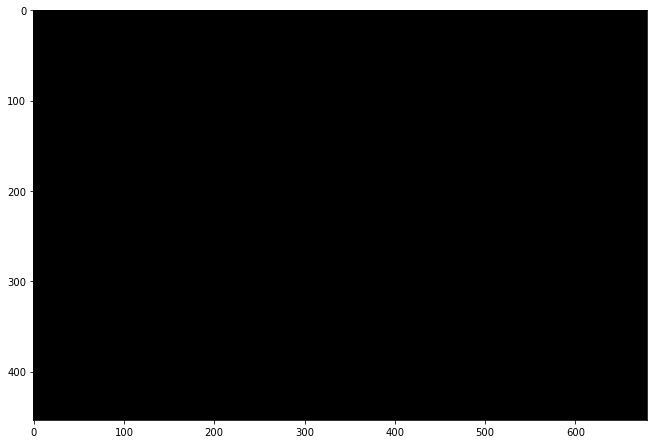

In [6]:
 show_transformed_images(train_dataset)

In [7]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=32,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=32,shuffle=False)

In [8]:
#Completed preprocessing, we'll start models implementation after thisu
#mini batch gradient descent will be applied if we mention the mini batch size~

In [9]:
def set_device():
    if torch.cuda.is_available():
        dev="cuda:0"
    else:
        dev="cpu"
    return torch.device(dev)

In [10]:
def train_nn(model,train_loader,test_loader,criterion,optimizer,n_epochs):
    device=set_device()
    
    for epoch in range(n_epochs):
        print("Epoch number %d"%(epoch+1))
        model.train()
        running_loss=0.0
        running_correct=0.0
        total=0
        
        for data in train_loader:
            images, labels=data
            images=images.to(device)
            labels=labels.to(device)
            total+=labels.size(0)
            
            optimizer.zero_grad()
            
            outputs=model(images)
            
            _,predicted=torch.max(outputs.data,1)
            
            loss=criterion(outputs,labels)
            
            loss.backward()
            
            optimizer.step()
            
            running_loss+=loss.item()
            
            running_correct+=(labels==predicted).sum().item()
            
        epoch_loss=running_loss/len(train_loader)
        epoch_acc=100.00*running_correct/total
        
        print(" -Training DS. Got %d out of %d images correctly (%.3f%%). Epoch  loss: %.3f" 
              % (running_correct,total,epoch_acc, epoch_loss))
        
        evaluate_model_on_test_set(model,test_loader)
        
    print("Finished")
    return model

In [11]:
def evaluate_model_on_test_set(model,test_loader):
    model.eval()
    predicted_correctly_on_epoch=0
    total=0
    device=set_device()
    
    with torch.no_grad():
        for data in test_loader:
            images, labels=data
            images=images.to(device)
            labels=labels.to(device)
            total+=labels.size(0) 
            
            outputs=model(images)
            
            _,predicted=torch.max(outputs.data,1)
            
            predicted_correctly_on_epoch += (predicted ==labels).sum().item()
            
    epoch_acc=100.0*predicted_correctly_on_epoch/total
    print(" -Testing DS. Got %d out of %d images correctly (%.3f%%)" 
              % (predicted_correctly_on_epoch,total,epoch_acc))

In [12]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

resnet18_model=models.resnet18(pretrained=False)
num_ftrs=resnet18_model.fc.in_features
number_of_classes=4
#now we take above 2 vars & in nn.linear-linear is the function that takes number of i/p & o/p features as parameters and 
#prepares required matrices for forward propagation
resnet18_model.fc=nn.Linear(num_ftrs,number_of_classes)
device=set_device()
resnet_18_model=resnet18_model.to(device)
loss_fn=nn.CrossEntropyLoss()
#using stochastic gradient descent for optimizer
optimizer=optim.SGD(resnet18_model.parameters(),lr=0.01,momentum=0.9,weight_decay=0.003)

In [13]:
train_nn(resnet18_model,train_loader,test_loader,loss_fn,optimizer,150)

Epoch number 1


C:\Users\hp\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


 -Training DS. Got 1444 out of 2870 images correctly (50.314%). Epoch  loss: 1.157
 -Testing DS. Got 395 out of 2870 images correctly (13.763%)
Epoch number 2
 -Training DS. Got 1662 out of 2870 images correctly (57.909%). Epoch  loss: 1.058
 -Testing DS. Got 395 out of 2870 images correctly (13.763%)
Epoch number 3
 -Training DS. Got 1863 out of 2870 images correctly (64.913%). Epoch  loss: 0.848
 -Testing DS. Got 463 out of 2870 images correctly (16.132%)
Epoch number 4
 -Training DS. Got 1990 out of 2870 images correctly (69.338%). Epoch  loss: 0.738
 -Testing DS. Got 401 out of 2870 images correctly (13.972%)
Epoch number 5
 -Training DS. Got 2038 out of 2870 images correctly (71.010%). Epoch  loss: 0.704
 -Testing DS. Got 395 out of 2870 images correctly (13.763%)
Epoch number 6
 -Training DS. Got 2163 out of 2870 images correctly (75.366%). Epoch  loss: 0.629
 -Testing DS. Got 395 out of 2870 images correctly (13.763%)
Epoch number 7
 -Training DS. Got 2268 out of 2870 images cor

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  